**Research Question: How does gender predict the reason for admission (i.e elective or emergency)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [2]:
missing_values = ['?', 'Unknown/Invalid']

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv', na_values=missing_values)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
df.shape

(101766, 50)

In [6]:
df2 = df[['encounter_id','patient_nbr','race','gender', 'admission_type_id', 'num_lab_procedures','num_medications','readmitted']]

In [7]:
df2.head(4)

,encounter_id,patient_nbr,race,gender,admission_type_id,num_lab_procedures,num_medications,readmitted
0,2278392,8222157,Caucasian,Female,6,41,1,NO
1,149190,55629189,Caucasian,Female,1,59,18,>30
2,64410,86047875,AfricanAmerican,Female,1,11,13,NO
3,500364,82442376,Caucasian,Male,1,44,16,NO


In [8]:
conditions = [
              (df['admission_type_id']==1),
               (df['admission_type_id']==2),
               (df['admission_type_id']==3),
               (df['admission_type_id']==4),
               (df['admission_type_id']==5),
              (df['admission_type_id']==6),
              (df['admission_type_id']==7),
              (df['admission_type_id']==8)
] 

In [9]:
values = ['Emergency','Urgent','Elective','Newborn','Not Available','NULL','Trauma Center','Not Mapped']

In [10]:
df2['AdmissionType'] = np.select(conditions,values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [11]:
df2.head(4)

,encounter_id,patient_nbr,race,gender,admission_type_id,num_lab_procedures,num_medications,readmitted,AdmissionType
0,2278392,8222157,Caucasian,Female,6,41,1,NO,NULL
1,149190,55629189,Caucasian,Female,1,59,18,>30,Emergency
2,64410,86047875,AfricanAmerican,Female,1,11,13,NO,Emergency
3,500364,82442376,Caucasian,Male,1,44,16,NO,Emergency


In [12]:
df2['AdmissionType'].value_counts()

Emergency        53990
Elective         18869
Urgent           18480
NULL              5291
Not Available     4785
Not Mapped         320
Trauma Center       21
Newborn             10
Name: AdmissionType, dtype: int64

In [13]:
df2['gender'].value_counts()

Female    54708
Male      47055
Name: gender, dtype: int64

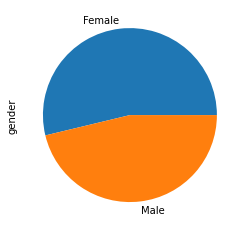

In [76]:
Gender = df2['gender'].value_counts().plot(kind='pie')

In [15]:
df2.groupby(['gender'])['AdmissionType'].value_counts(normalize=True)

gender  AdmissionType
Female  Emergency        0.538276
        Urgent           0.180851
        Elective         0.179864
        NULL             0.049883
        Not Available    0.047690
        Not Mapped       0.003217
        Trauma Center    0.000165
        Newborn          0.000055
Male    Emergency        0.521517
        Elective         0.191861
        Urgent           0.182467
        NULL             0.054447
        Not Available    0.046244
        Not Mapped       0.003060
        Trauma Center    0.000255
        Newborn          0.000149
Name: AdmissionType, dtype: float64

In [16]:
df3 = df2[df2['gender']=='Female']

In [17]:
df3 = df3[['gender','AdmissionType']]

In [18]:
df3.head(5)

,gender,AdmissionType
0,Female,NULL
1,Female,Emergency
2,Female,Emergency
8,Female,Urgent
9,Female,Elective


In [19]:
df4 = df2[df2['gender']=='Male']

In [20]:
df4 = df4[['gender','AdmissionType']]

In [21]:
df4.head(5)

,gender,AdmissionType
3,Male,Emergency
4,Male,Emergency
5,Male,Urgent
6,Male,Elective
7,Male,Emergency


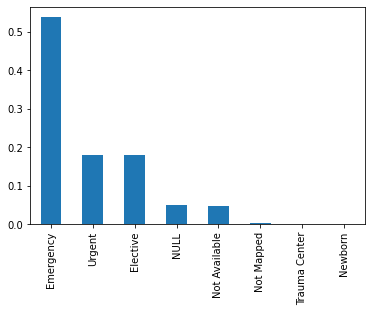

In [22]:
Female_Admission_Reason = df3['AdmissionType'].value_counts(normalize=True).plot(kind='bar')

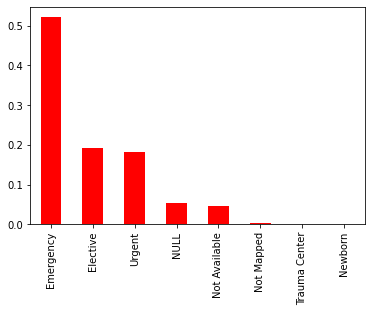

In [23]:
Male_Admission_Reason = df4['AdmissionType'].value_counts(normalize=True).plot(kind='bar',color='red')

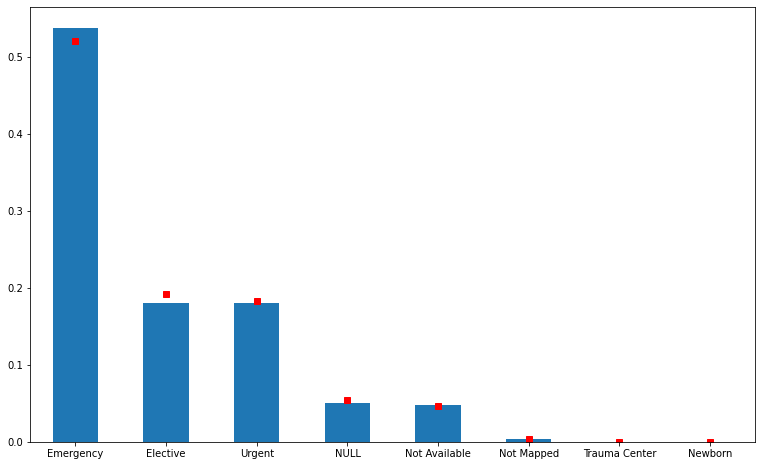

In [24]:
ax = df3['AdmissionType'].value_counts(normalize=True).plot(kind='bar', alpha=1)
df4['AdmissionType'].value_counts(normalize=True).plot(kind='line',color='red', ax=ax, marker='s', linestyle=' ', alpha=1,  figsize=(13,8))

**Analysis: As seen above, Females are more likely to be admitted due to an emergency and less likely to be admitted electively. All other reasons tend to stay about the same.**

In [33]:
import seaborn as sns #using seaborn to get a similar graph to above

In [63]:
AdmissionCounts = df2.groupby(['gender'])['AdmissionType'].value_counts(normalize=True).rename('Percentage').mul(100).reset_index().sort_values('AdmissionType')

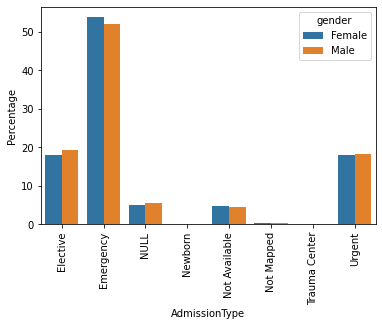

In [65]:
p = sns.barplot(x='AdmissionType',y='Percentage',hue='gender',data=AdmissionCounts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

***Extra Work:***

In [25]:
conditions2 = [(df['readmitted']=='NO'),
               (df['readmitted']=='<30'),
               (df['readmitted']=='>30')]

In [26]:
values2 = ['No','Yes','Yes']

In [27]:
df2['ReadmissionStatus'] = np.select(conditions2,values2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [28]:
df2.head(4)

,encounter_id,patient_nbr,race,gender,admission_type_id,num_lab_procedures,num_medications,readmitted,AdmissionType,ReadmissionStatus
0,2278392,8222157,Caucasian,Female,6,41,1,NO,NULL,No
1,149190,55629189,Caucasian,Female,1,59,18,>30,Emergency,Yes
2,64410,86047875,AfricanAmerican,Female,1,11,13,NO,Emergency,No
3,500364,82442376,Caucasian,Male,1,44,16,NO,Emergency,No


In [29]:
df5 = df2[['race','num_lab_procedures','num_medications','ReadmissionStatus']]

In [30]:
df5.head(4)

,race,num_lab_procedures,num_medications,ReadmissionStatus
0,Caucasian,41,1,No
1,Caucasian,59,18,Yes
2,AfricanAmerican,11,13,No
3,Caucasian,44,16,No


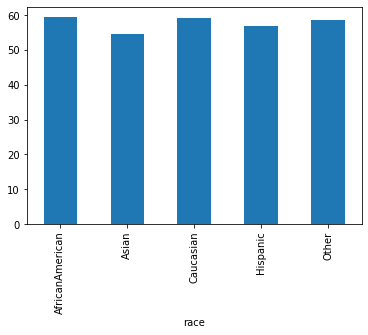

In [66]:
LabAndMeds = (df5.groupby(['race'])['num_lab_procedures'].mean() + df5.groupby(['race'])['num_medications'].mean()).plot(kind='bar')

**Of note: Asian Patients tend to have the least total lab procedures and medications used on them**

In [70]:
ReadmissionCounts = df2.groupby(['race'])['ReadmissionStatus'].value_counts(normalize=True).rename('Percentage2').mul(100).reset_index().sort_values('ReadmissionStatus')

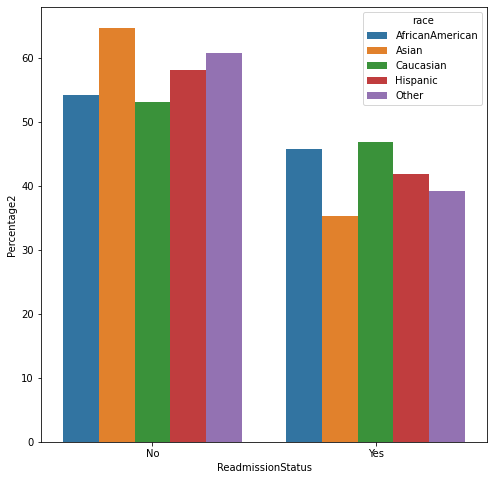

In [75]:
f, ax = plt.subplots(figsize=(8, 8))
p = sns.barplot(x='ReadmissionStatus',y='Percentage2',hue='race',data=ReadmissionCounts, ax=ax)

**Of Note: Asian Patients tend to have the lowest readmission rate**

***Biases: The sample size of asian patients is smaller than all other races. This may be the reason for the differences seen above***